In [2]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
df = pd.read_csv("CreditCard.csv")

In [6]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [21]:
df.shape

(660, 7)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


In [7]:
df.dtypes

Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


/Users/meena/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a171c4250>,
      dtype=object)

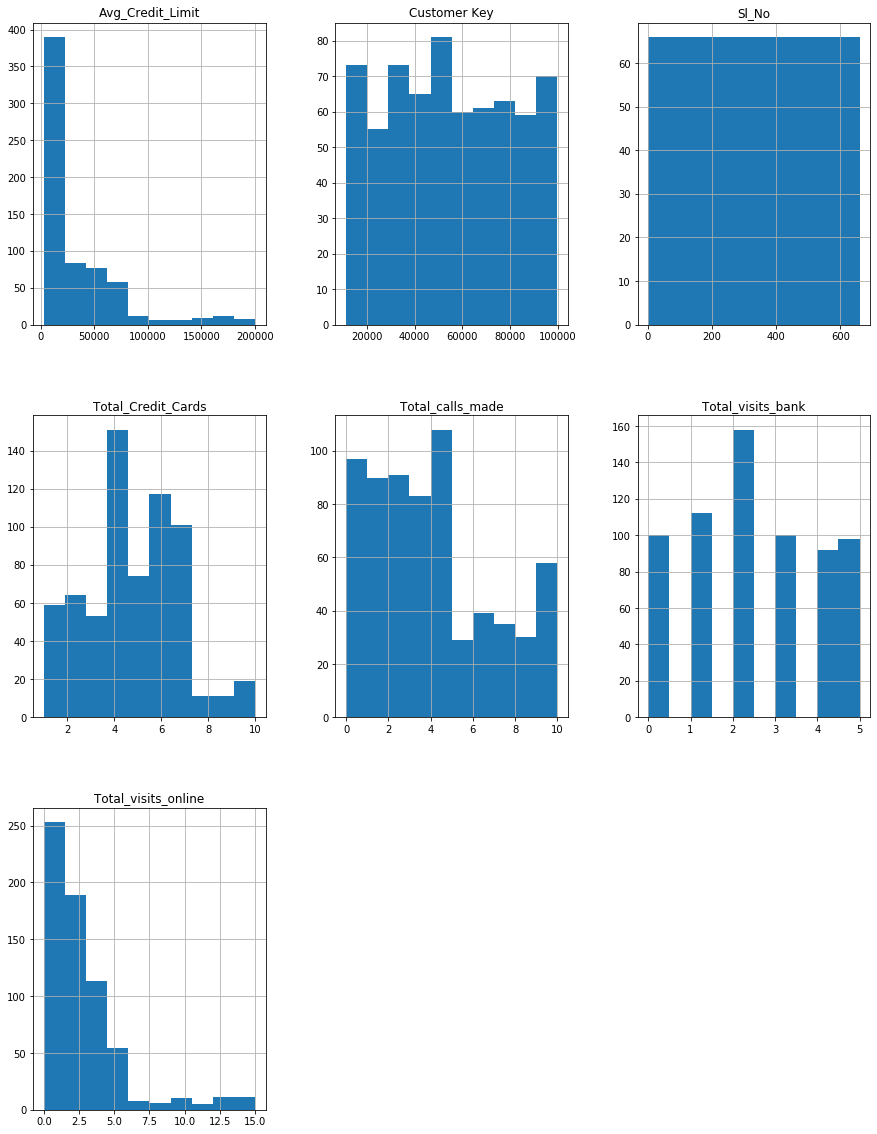

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

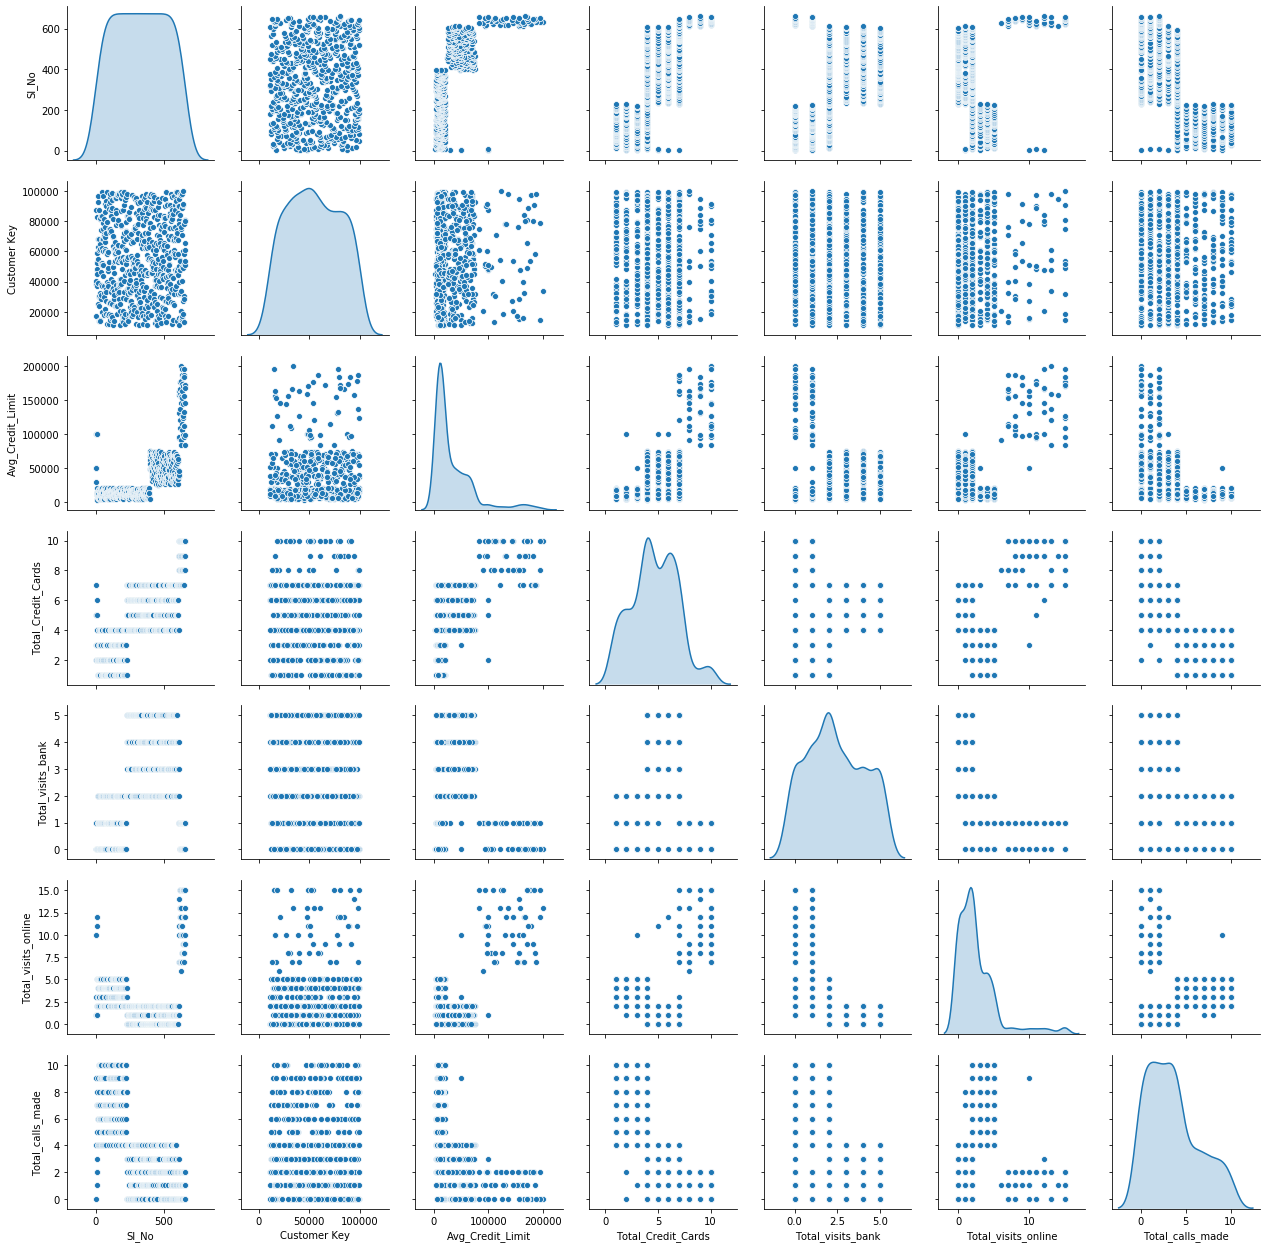

In [14]:
sb.pairplot(df, diag_kind = "kde")

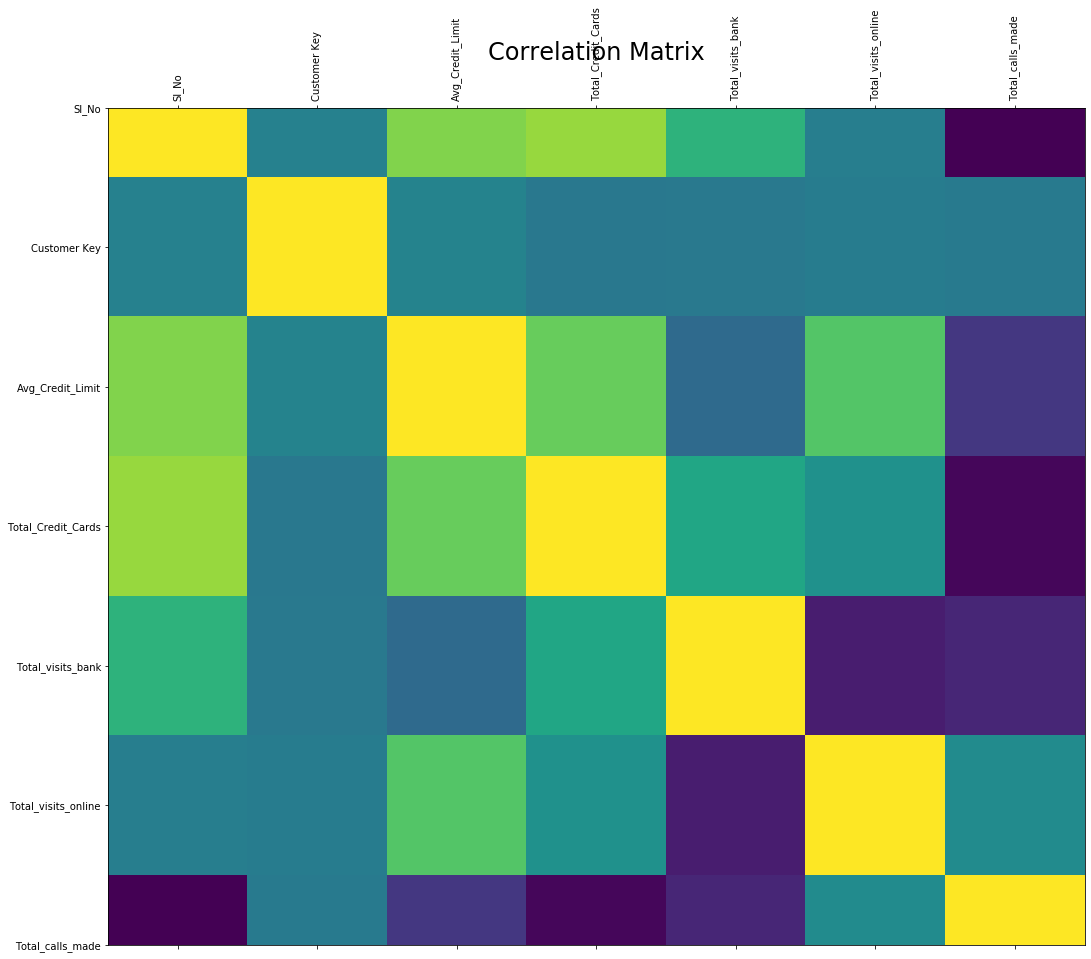

In [18]:
fig = plt.figure(figsize=(20, 15))
plt.matshow(df.corr(), fignum=fig.number)
plt.title('Correlation Matrix', fontsize=24);
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=90)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
plt.show()
plt.close(fig)

In [26]:
df.isna().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [28]:
from scipy.stats import zscore
df_z = df.apply(zscore)
df_z.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,-1.729428,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,-1.724180,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,-1.718931,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-1.713683,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,-1.708434,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [29]:
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = sc.fit_transform(df) 

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df, 'ward', metric='euclidean')
Z.shape

(659, 4)

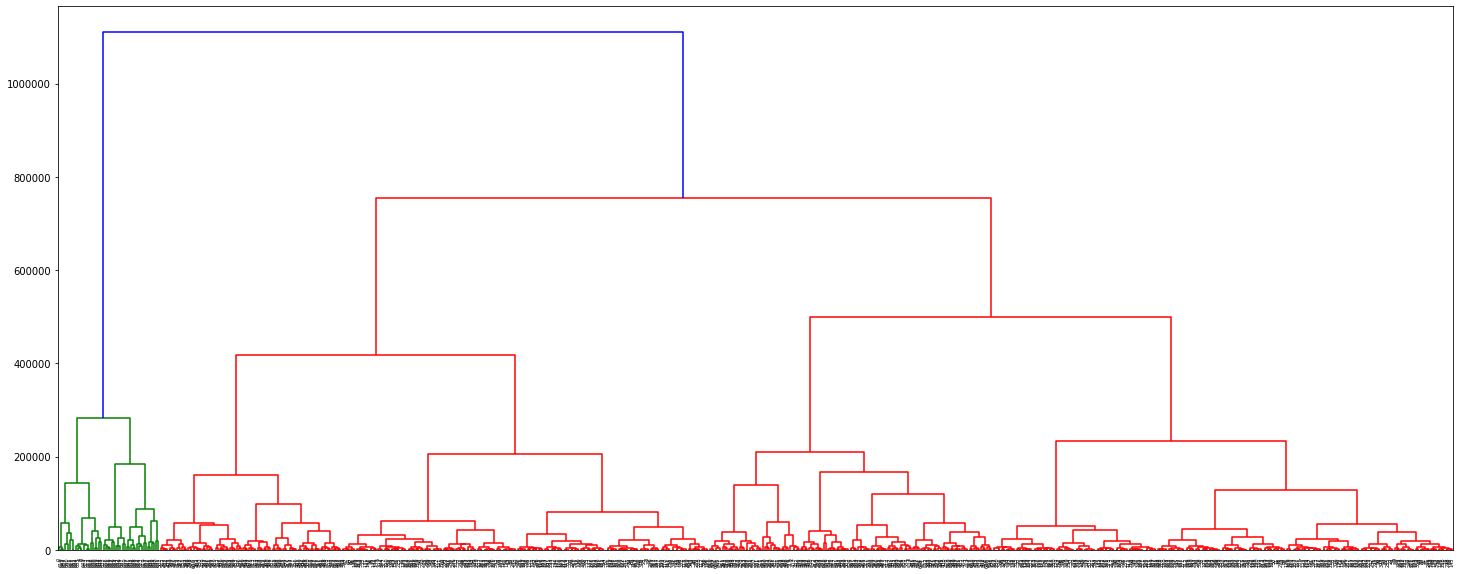

In [31]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

In [32]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

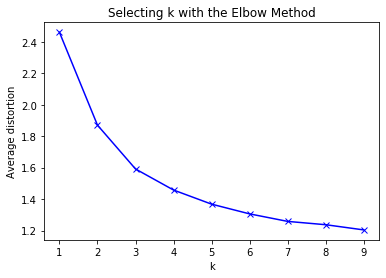

In [35]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    meanDistortions.append(sum(np.min(cdist(df_z, model.cluster_centers_, 'euclidean'), axis=1)) / df_z.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [36]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(df_z)
prediction=final_model.predict(df_z)

#Append the prediction 
df["GROUP"] = prediction
df_z["GROUP"] = prediction
print("Groups Assigned : \n")
df.head()

Groups Assigned : 



,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,GROUP
0,1,87073,100000,2,1,1,0,0
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,2
3,4,40496,30000,5,1,1,4,1
4,5,47437,100000,6,0,12,3,3


In [38]:
df_clust = df.groupby(['GROUP'])
df_clust.mean()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
GROUP,,,,,,,
0,441.360656,77747.557377,38377.049180,5.562842,3.486339,0.939891,1.989071
1,116.062780,55270.789238,12246.636771,2.408072,0.923767,3.547085,6.883408
2,396.642157,34336.892157,29475.490196,5.460784,3.490196,1.039216,2.019608
3,611.280000,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a21a21b50>,
      dtype=object)

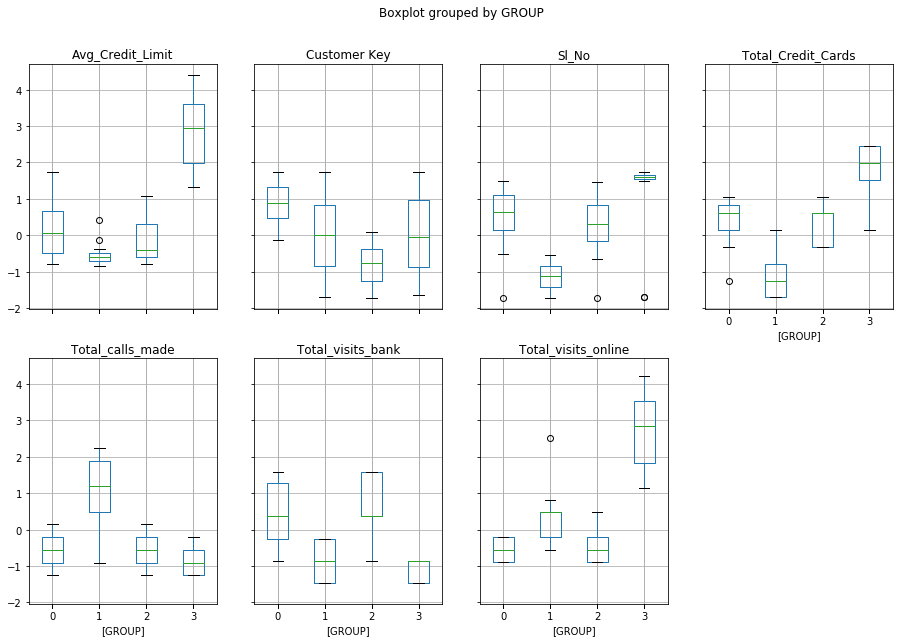

In [39]:
df_z.boxplot(by='GROUP', layout = (2,4),figsize=(15,10))